In [1]:
import pandas as pd
import sys
import os
import scanpy as sc
import swan_vis as swan

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
# read in the data relevant for this figure
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    
    return df

def get_tss_bed():

    fname = '../processing/ends/sc_tss.bed'
    df = pd.read_csv(fname, sep='\t', header=None, usecols=[3,9])
    df.columns = ['peak_id', 'read_name']
    
    return df

def get_tss_raw_adata():
    fname = '../processing/scanpy/sc_tss_raw.h5ad'
    adata = sc.read(fname)
    
    return adata

# get the t_df from the swan object with the tsss added to it
def get_swan_data():
    fname = '../processing/swan/sc_tss_iso_swan.p'
    sg = swan.SwanGraph(fname)
    t_df = sg.t_df
    cell_type_map = {'Cluster_1_counts': '1', 
                 'Cluster_2_counts': '2', 
                 'Cluster_3_counts': '3', 
                 'Cluster_4_counts': '4', 
                 'Cluster_5_counts': '5', 
                 'Cluster_6_counts': '6', 
                 'Cluster_7_counts': '7'}
    t_df.rename(cell_type_map, axis=1, inplace=True)
    return t_df

### Panel 4C

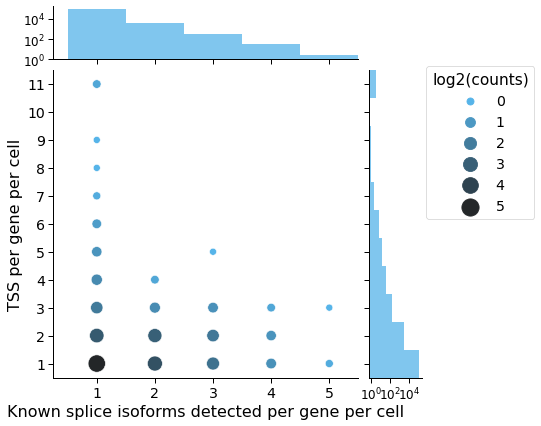

In [3]:
df = get_sc_data()
tss = get_tss_bed()

ylim = 11
xlim = 5

opref = 'figures/sc_tss'

plot_ends_iso_cell(df, tss, opref, kind='tss', xlim=xlim, ylim=ylim)

### Panel 4E

Graph from ../processing/swan/sc_tss_iso_swan.p loaded


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


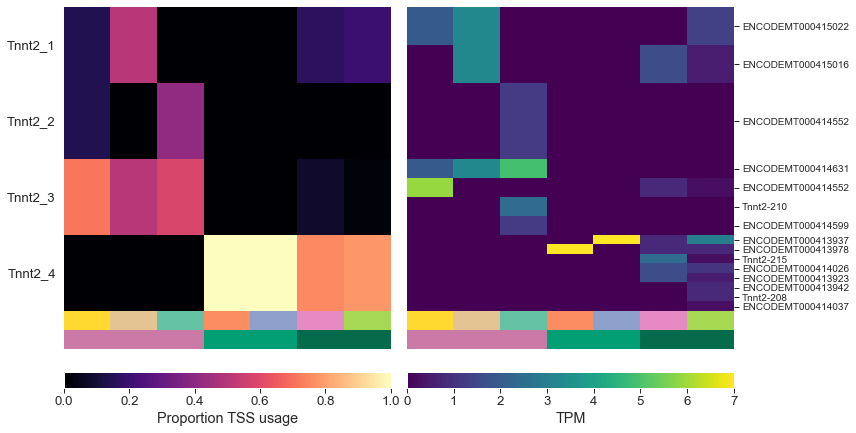

In [4]:
groups = ['1', '2', '3', '4', '5', '6', '7']
group_names = groups
adata = get_tss_raw_adata()
t_df = get_swan_data()

plot_tss_iso_heatmap(adata, t_df, groups, group_names, 'Tnnt2', 'figures/tss_iso')